<Axes: >

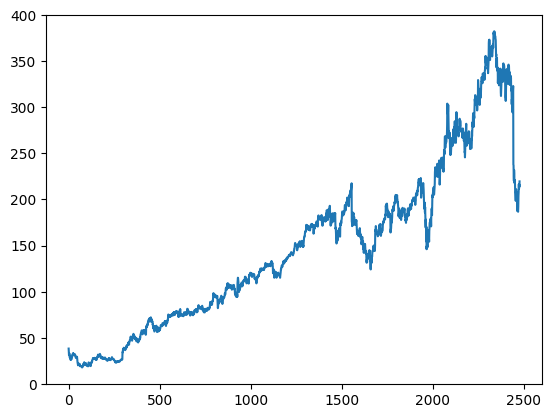

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/minknhom/dataset/main/FB.csv', index_col='Date')

start_date = '2010-01-01'
end_date = '2022-12-31'

df = df[(df.index >= start_date) & (df.index <= end_date)]

df1 = df.reset_index()['Close']

df1.plot()

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# Mục mới

In [4]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]


In [5]:

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
26/26 [==============================] - 13s 198ms/step - loss: 0.0147
Epoch 2/100
26/26 [==============================] - 6s 249ms/step - loss: 7.6340e-04
Epoch 3/100
26/26 [==============================] - 5s 194ms/step - loss: 2.9854e-04
Epoch 4/100
26/26 [==============================] - 6s 244ms/step - loss: 2.6156e-04
Epoch 5/100
26/26 [==============================] - 5s 201ms/step - loss: 2.6152e-04
Epoch 6/100
26/26 [==============================] - 6s 228ms/step - loss: 2.5149e-04
Epoch 7/100
26/26 [==============================] - 6s 214ms/step - loss: 2.4362e-04
Epoch 8/100
26/26 [==============================] - 5s 191ms/step - loss: 2.6849e-04
Epoch 9/100
26/26 [==============================] - 6s 241ms/step - loss: 2.4607e-04
Epoch 10/100
26/26 [==============================] - 5s 197ms/step - loss: 2.3830e-04
Epoch 11/100
26/26 [==============================] - 6s 243ms/step - loss: 2.3151e-04
Epoch 12/100
26/26 [==============================] - 5

In [10]:
train_predict=model.predict(X_train)
y_pred = model.predict(X_test)


21/21 [==============================] - 1s 43ms/step


In [11]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((y_test- y_pred) / y_test) * 100

# Tính giá trị MAPE
mape = np.mean(errors)
print('Testing MAPE:', mape)
from sklearn.metrics import mean_absolute_error

# y_true là mảng chứa các giá trị thực tế
# y_pred là mảng chứa các giá trị dự đoán
mae = mean_absolute_error(y_test, y_pred)
print('Testing MAE:', mae)


Testing MAPE: 26.499912426362222
Testing MAE: 0.05513539767819246


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [13]:
train_size = int(0.7 * len(df1))
test_size1 = len(df1) - train_size -101

train_data = df1[:train_size]
test_data1 = df1[train_size:train_size+test_size1]

In [14]:
test_data1=scaler.inverse_transform(test_data1)

In [15]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - test_data1)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 48.733897935856994


In [16]:
import matplotlib.pyplot as plt


In [17]:
x_input = test_data[-100:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1
future_predictions = scaler.inverse_transform(lst_output)



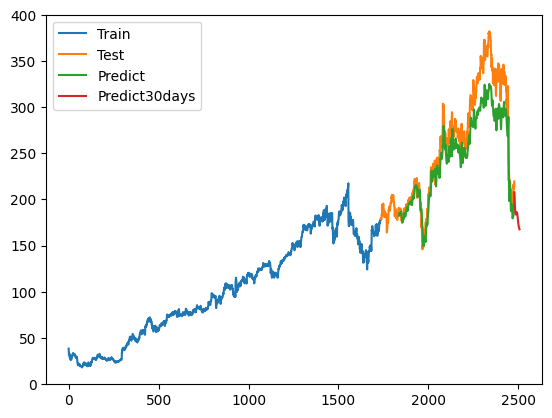

In [18]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

# Mục mới